<a href="https://colab.research.google.com/github/ElizarSaenko/ML_SAENKO/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [1]:
! pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/heart.csv')
except FileNotFoundError:
    df = pd.read_csv('heart.csv')

df['AGE_50'] = df['AGE_50'].astype('category')
df['MD_50'] = df['MD_50'].astype('category')
df['SES'] = df['SES'].astype('category')
df['CL_STATUS'] = df['CL_STATUS'].astype('category')
df['MD_62'] = df['MD_62'].astype('category')
df['IHD_DX'] = df['IHD_DX'].astype('category')
df['DEATH'] = df['DEATH'].astype('category')

y = df['WT_50'] # выбираем целевую переменную (количественная)
X = df.drop(['WT_50','WT_62'], axis=1) # переменные для проверки влияния

In [3]:
X

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,IHD_DX,DEATH
0,42,1,110,65,64,291,2,8,4,120,78,271,2,1
1,53,1,130,72,69,278,1,6,2,122,68,250,9,1
2,53,2,120,90,70,342,4,8,1,132,90,304,2,1
3,48,4,120,80,72,239,4,8,2,118,68,209,3,1
4,53,3,118,74,66,243,3,8,5,118,56,261,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,0,0
196,23,1,110,70,69,120,3,8,2,112,76,198,0,0
197,20,3,130,80,66,210,5,0,1,130,85,274,0,0
198,46,3,140,84,66,130,4,6,2,148,88,160,0,0


Преобразование категориальных переменных остается без изменений

In [ ]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [4]:
X

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,IHD_DX,DEATH
0,42,1,110,65,64,291,2,8,4,120,78,271,2,1
1,53,1,130,72,69,278,1,6,2,122,68,250,9,1
2,53,2,120,90,70,342,4,8,1,132,90,304,2,1
3,48,4,120,80,72,239,4,8,2,118,68,209,3,1
4,53,3,118,74,66,243,3,8,5,118,56,261,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,0,0
196,23,1,110,70,69,120,3,8,2,112,76,198,0,0
197,20,3,130,80,66,210,5,0,1,130,85,274,0,0
198,46,3,140,84,66,130,4,6,2,148,88,160,0,0


In [5]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,IHD_DX,DEATH,y
0,42,1,110,65,64,291,2,8,4,120,78,271,2,1,147
1,53,1,130,72,69,278,1,6,2,122,68,250,9,1,167
2,53,2,120,90,70,342,4,8,1,132,90,304,2,1,222
3,48,4,120,80,72,239,4,8,2,118,68,209,3,1,229
4,53,3,118,74,66,243,3,8,5,118,56,261,2,1,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,0,0,148
196,23,1,110,70,69,120,3,8,2,112,76,198,0,0,137
197,20,3,130,80,66,210,5,0,1,130,85,274,0,0,150
198,46,3,140,84,66,130,4,6,2,148,88,160,0,0,138


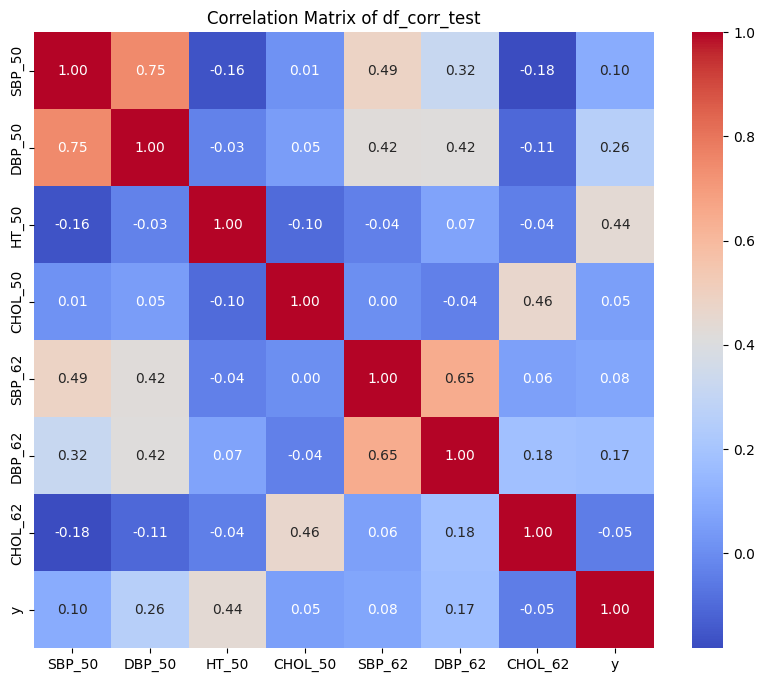

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)


correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()




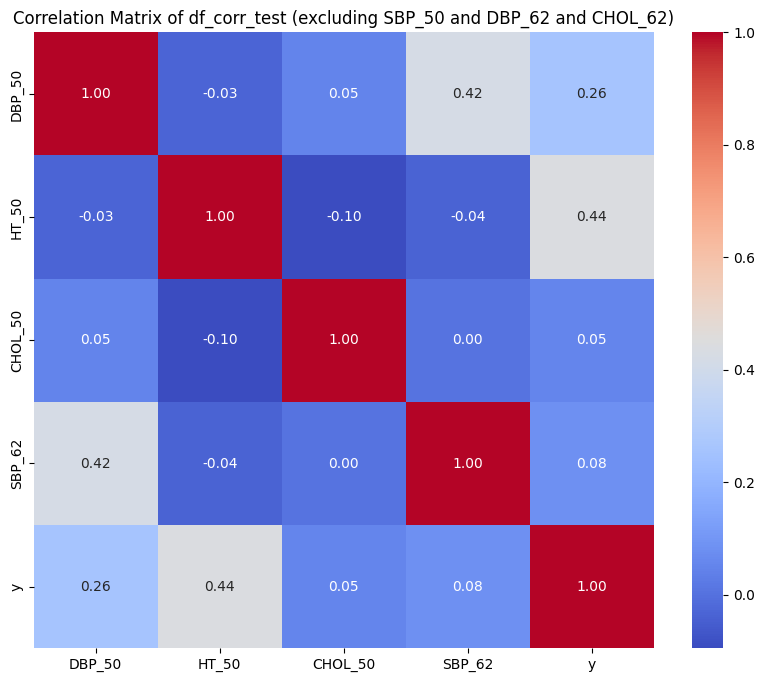

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Удаляем ненужные столбцы
df_corr_test_filtered = df_corr_test.drop(columns=['SBP_50', 'DBP_62', 'CHOL_62'], errors='ignore')

# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test_filtered.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test (excluding SBP_50 and DBP_62 and CHOL_62)")
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [41]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать


Regularization: None
Mean Absolute Error (MAE): 19.95
Mean Squared Error (MSE): 616.70
R^2 Score: 0.21


In [42]:
resolve_regression(X[['HT_50', 'DBP_50']], y)
None


Regularization: None
Mean Absolute Error (MAE): 18.53
Mean Squared Error (MSE): 518.51
R^2 Score: 0.33


Mean Absolute Error (MAE) — средняя абсолютная ошибка. Рассчитывается как среднее значение абсолютной разницы между прогнозами и фактическими наблюдениями.

Mean Squared Error (MSE) — средняя квадратичная ошибка. Рассчитывается как среднее значение квадратов разностей между прогнозируемыми и фактически наблюдаемыми значениями.


1. Mean Absolute Error (MAE):

  Для полной модели MAE составляет 19.95, а для модели с двумя признаками — 18.53. Это означает, что вторая модель в среднем делает более точные предсказания, чем первая.

2. Mean Squared Error (MSE):

   Для полной модели MSE равен 616.70, а для модели с двумя признаками — 518.51. Меньшее значение MSE для второй модели также указывает на то, что она более точно предсказывает значения.

    R² (коэффициент детерминации) показывает долю вариации целевой переменной, объясненную моделью. Значение R² варьируется от 0 до 1, где 1 означает идеальное объяснение вариации. Для полной модели R² составляет 0.21, а для модели с одним признаком — 0.33. Это говорит о том, что модель с двумя признаками объясняет большую часть вариации в целевой переменной по сравнению с полной моделью, но они обе делают это просто ужасно.

Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [23]:
X

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,IHD_DX,DEATH
0,42,1,110,65,64,291,2,8,4,120,78,271,2,1
1,53,1,130,72,69,278,1,6,2,122,68,250,9,1
2,53,2,120,90,70,342,4,8,1,132,90,304,2,1
3,48,4,120,80,72,239,4,8,2,118,68,209,3,1
4,53,3,118,74,66,243,3,8,5,118,56,261,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,0,0
196,23,1,110,70,69,120,3,8,2,112,76,198,0,0
197,20,3,130,80,66,210,5,0,1,130,85,274,0,0
198,46,3,140,84,66,130,4,6,2,148,88,160,0,0


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AGE_50     200 non-null    category
 1   MD_50      200 non-null    category
 2   SBP_50     200 non-null    int64   
 3   DBP_50     200 non-null    int64   
 4   HT_50      200 non-null    int64   
 5   CHOL_50    200 non-null    int64   
 6   SES        200 non-null    category
 7   CL_STATUS  200 non-null    category
 8   MD_62      200 non-null    category
 9   SBP_62     200 non-null    int64   
 10  DBP_62     200 non-null    int64   
 11  CHOL_62    200 non-null    int64   
 12  IHD_DX     200 non-null    category
 13  DEATH      200 non-null    category
dtypes: category(7), int64(7)
memory usage: 15.3 KB


Отбор признаков по корреляции

In [25]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [27]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [28]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 18.95
Mean Squared Error (MSE): 540.32
R^2 Score: 0.30


In [29]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 20.19
Mean Squared Error (MSE): 584.72
R^2 Score: 0.25


Regularization: None
Mean Absolute Error (MAE): 20.19
Mean Squared Error (MSE): 584.72
R^2 Score: 0.25


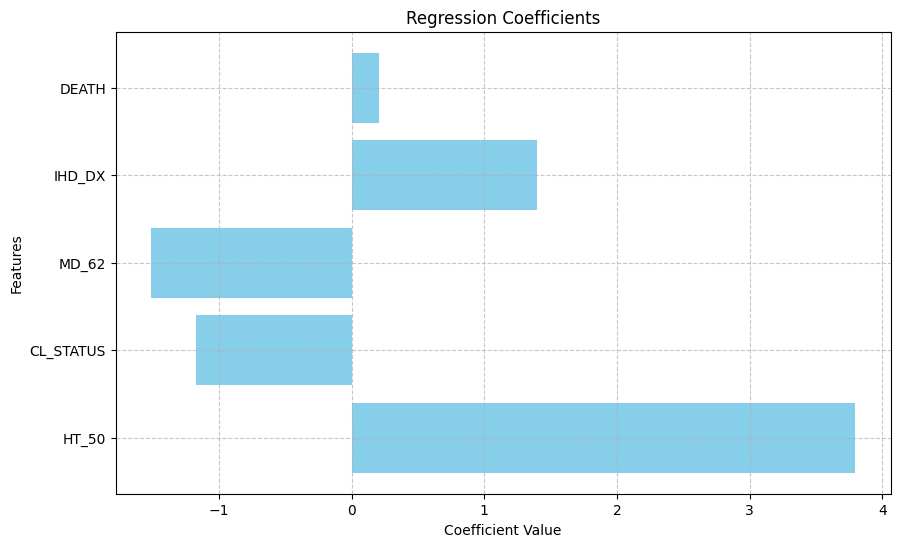

In [30]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 0.20 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 0.584 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.25 — модель объясняет 25% дисперсии данных, что указывает на ничтожную точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.25 означает, что модель объясняет 25% вариации данных. Это значит, что 25% разброса в значениях целевой переменной модель смогла предсказать, а 75% остаются необъясненными (шум или неизвестные факторы).

In [31]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['int64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


<ipython-input-31-e8fd9b11681e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [32]:
X_selected_rfe

,HT_50,CL_STATUS,MD_62,IHD_DX,DEATH
0,0.214286,8,4,2,1
1,0.571429,6,2,9,1
2,0.642857,8,1,2,1
3,0.785714,8,2,3,1
4,0.357143,8,5,2,1
...,...,...,...,...,...
195,0.357143,8,1,0,0
196,0.571429,8,2,0,0
197,0.357143,0,1,0,0
198,0.357143,6,2,0,0


Regularization: None
Mean Absolute Error (MAE): 20.19
Mean Squared Error (MSE): 584.72
R^2 Score: 0.25


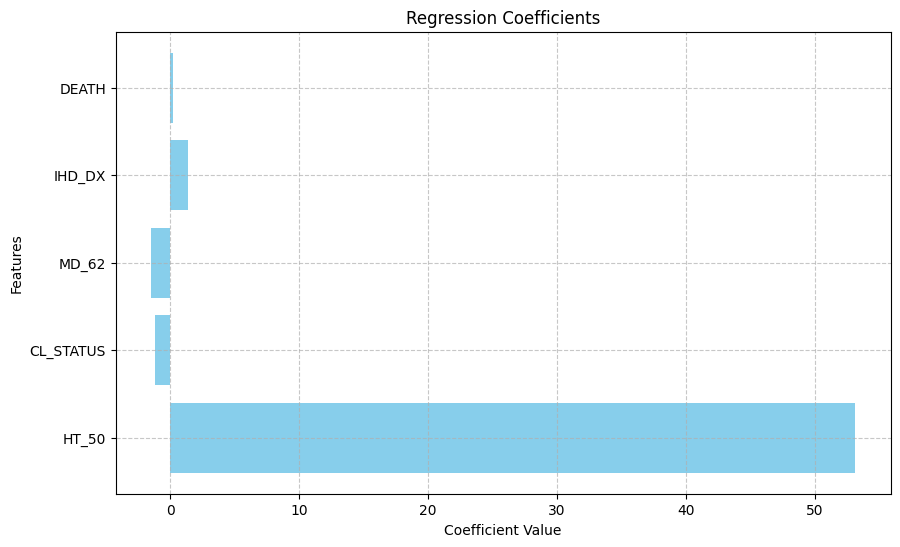

In [33]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [34]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 20.19
Mean Squared Error (MSE): 584.72
R^2 Score: 0.25


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [35]:
X

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,IHD_DX,DEATH
0,42,1,110,65,64,291,2,8,4,120,78,271,2,1
1,53,1,130,72,69,278,1,6,2,122,68,250,9,1
2,53,2,120,90,70,342,4,8,1,132,90,304,2,1
3,48,4,120,80,72,239,4,8,2,118,68,209,3,1
4,53,3,118,74,66,243,3,8,5,118,56,261,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,0,0
196,23,1,110,70,69,120,3,8,2,112,76,198,0,0
197,20,3,130,80,66,210,5,0,1,130,85,274,0,0
198,46,3,140,84,66,130,4,6,2,148,88,160,0,0


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 19.81
Mean Squared Error (MSE): 600.70
R^2 Score: 0.23


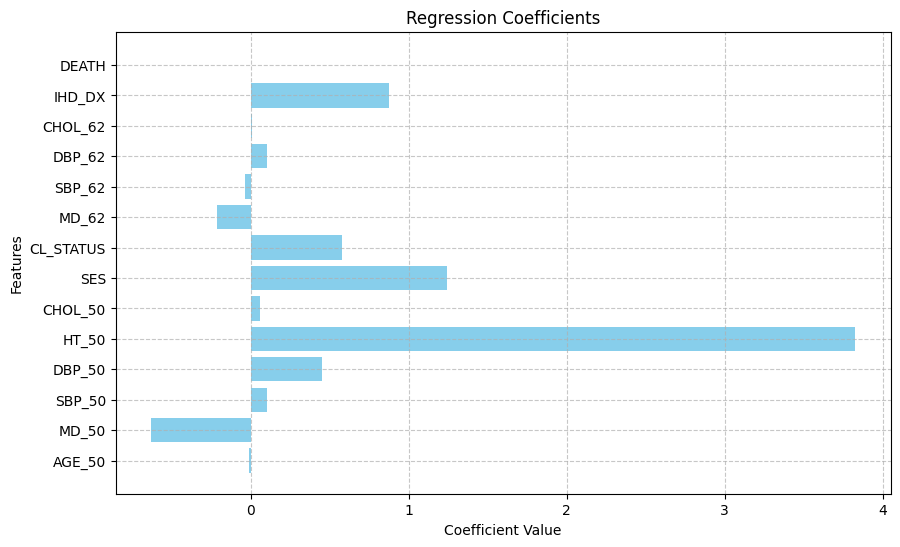

In [36]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 19.95
Mean Squared Error (MSE): 616.51
R^2 Score: 0.21


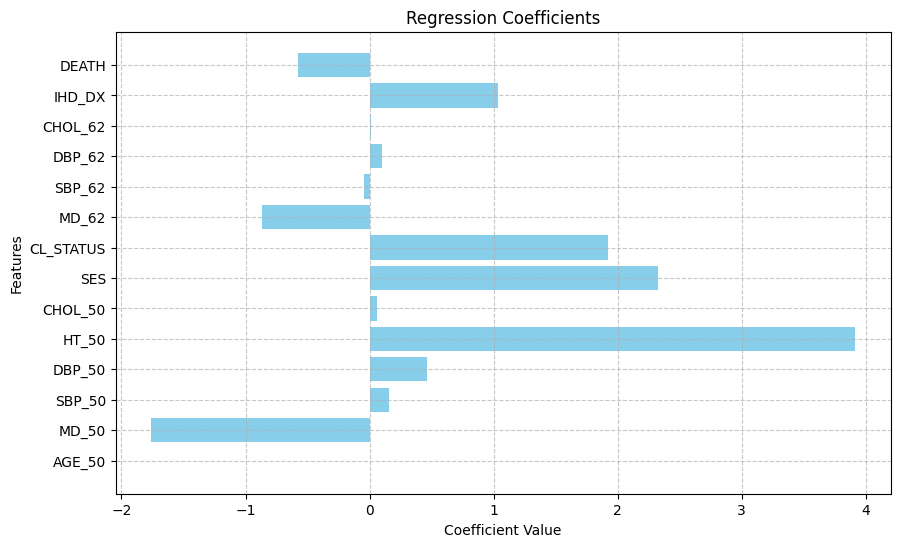

In [37]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 19.95
Mean Squared Error (MSE): 616.70
R^2 Score: 0.21


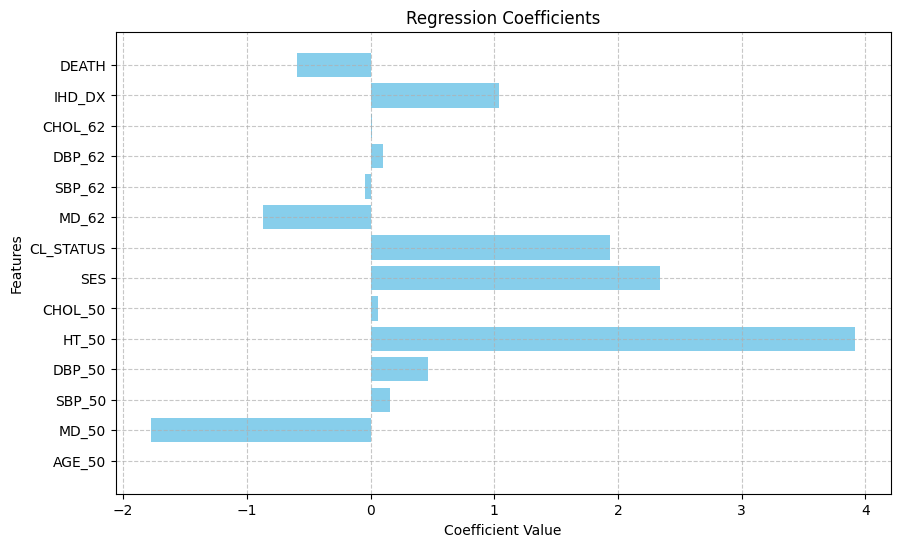

In [38]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)
